In [20]:
import os
import pickle
import json
import pandas as pd
import matplotlib.pyplot as plt

GLOBALS = pickle.load(open('../data/globals.p', 'rb'))
GLOBALS

{'absolute_filepaths': {'metadata': '/Volumes/ARCHIVES/Thesis/data/metadata.csv',
  'conversion_log': '/Volumes/ARCHIVES/Thesis/data/conversion_log.csv',
  'xml': '/Volumes/ARCHIVES/Thesis/data/xml/',
  'archive': '/Volumes/ARCHIVES/Thesis/data/archive/',
  'corpus': '/Volumes/ARCHIVES/Thesis/data/corpus/',
  'data': '/Volumes/ARCHIVES/Thesis/data/',
  'root': '/Volumes/ARCHIVES/Thesis/'},
 'start': 2009,
 'end': 2019}

In [141]:
scores_df = None
#GLOBALS['absolute_filepaths']['root'] + 'results/scores.txt'
with open('/Volumes/ARCHIVES/Thesis/src/sporc_doc2vec/scores.txt') as file:
    raw_scores = json.load(file)
    scores_df = pd.DataFrame(raw_scores)
    scores_series = scores_df['score']
    scores_df = scores_df['parameters'].apply(pd.Series)
    scores_df['score'] = scores_series
    
scores_df

,corpus,dm,epochs,hs,min_count,vector_size,window,score
0,abstracts/basic_preprocessing,0,10,0,5,100,10,0.35360
1,abstracts/basic_preprocessing,0,10,0,5,100,5,0.35675
2,abstracts/basic_preprocessing,0,10,0,5,100,20,0.35785
3,abstracts/basic_preprocessing,0,10,0,5,100,2,0.35460
4,abstracts/basic_preprocessing,0,10,0,2,100,5,0.35280
...,...,...,...,...,...,...,...,...
878,abstracts/basic_preprocessing,0,50,1,10,7500,5,0.42095
879,abstracts/basic_preprocessing,1,10,0,5,7500,5,0.40735
880,abstracts/basic_preprocessing,1,10,0,20,2500,10,0.44685
881,abstracts/basic_preprocessing,1,10,0,10,5000,5,0.40465


In [137]:
scores_df['score'].sort_values(ascending=False)

787    0.47620
826    0.47535
808    0.47530
841    0.47505
770    0.47435
        ...   
160    0.34780
185    0.34750
836    0.34505
810    0.34375
749    0.34340
Name: score, Length: 882, dtype: float64

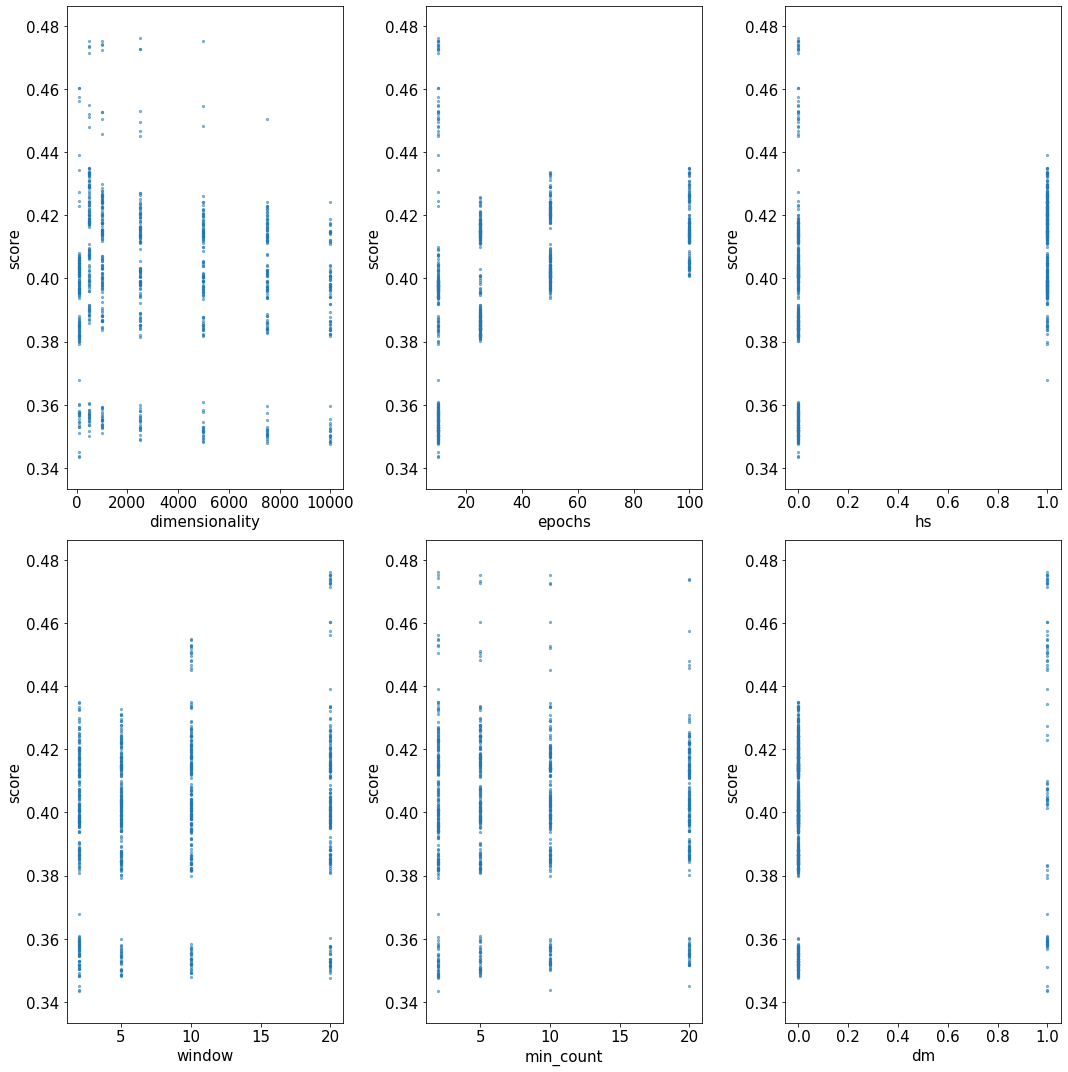

In [126]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Plot dimensionality against scores. 
axes[0, 0].scatter(scores_df['vector_size'], scores_df['score'], alpha=0.5, s=5)
axes[0, 0].set_ylabel('score')
axes[0, 0].set_xlabel('dimensionality')

# Plot epochs against scores.
axes[0, 1].scatter(scores_df['epochs'], scores_df['score'], alpha=0.5, s=5, )
axes[0, 1].set_ylabel('score')
axes[0, 1].set_xlabel('epochs')

# Plot hs against scores.
axes[0, 2].scatter(scores_df['hs'], scores_df['score'], alpha=0.5, s=5)
axes[0, 2].set_ylabel('score')
axes[0, 2].set_xlabel('hs')

# Plot window against scores.
axes[1, 0].scatter(scores_df['window'], scores_df['score'], alpha=0.5, s=5)
axes[1, 0].set_ylabel('score')
axes[1, 0].set_xlabel('window')

# Plot window against scores.
axes[1, 1].scatter(scores_df['min_count'], scores_df['score'], alpha=0.5, s=5)
axes[1, 1].set_ylabel('score')
axes[1, 1].set_xlabel('min_count')

# Plot dm against scores.
axes[1, 2].scatter(scores_df['dm'], scores_df['score'], alpha=0.5, s=5)
axes[1, 2].set_ylabel('score')
axes[1, 2].set_xlabel('dm')

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize'] = 15
fig.tight_layout()

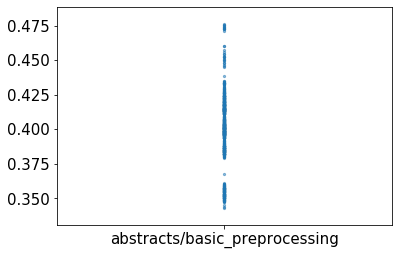

In [128]:
plt.scatter(scores_df['corpus'], scores_df['score'], alpha=0.5, s=5)